In [1]:
import pandas as pd
dfs = pd.read_csv('../data/experimental_nucl_mut.csv')
my_list = dfs['Residue'].tolist()

In [2]:
import pandas as pd
#load results of Evo2 predictions
result_df= pd.read_csv('result_df.csv')
result_df = result_df.iloc[1:].reset_index(drop=True)
result_df

,variant_name,ref_seq,mut_seq,ref_score,mut_score,delta_score
0,T-1-A-a,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.959835,-0.005349
1,S-21-A-a,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.961840,-0.007353
2,S-22-A-a,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.955226,-0.000740
3,G-23-A-a,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.960332,-0.005846
4,A-46-A-a,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.955202,-0.000716
...,...,...,...,...,...,...
1275,G-129---c,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.982843,-0.028357
1276,S-130---c,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.981798,-0.027312
1277,S-132---c,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.968863,-0.014377
1278,Y-136---c,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.971387,-0.016900


In [3]:
def extract_variant_position(variant):
    parts = variant.split('-')
    return parts[0] + parts[1]

result_df['variant_pos'] = result_df['variant_name'].apply(extract_variant_position)

# Step 2: Group delta_scores by variant position
grouped = result_df.groupby('variant_pos')['delta_score'].apply(list)

# Step 3: Convert into DataFrame with one column per variant_pos
max_len = grouped.map(len).max()
expanded = pd.DataFrame({col: vals + [None]*(max_len - len(vals)) for col, vals in grouped.items()})
expanded.insert(0, "Residue", my_list)
expanded.set_index("Residue", inplace=True)

In [4]:
import re

def numeric_key(col_name):
    # Extract number after first letter(s)
    match = re.search(r'\d+', col_name)
    return int(match.group()) if match else float('inf')

cols_to_sort = expanded.columns.tolist()

# Sort columns numerically by their embedded number
sorted_cols = sorted(cols_to_sort, key=numeric_key)

# Reorder DataFrame columns
expanded = expanded[sorted_cols]
#Average codons encoding for the same residue mutation
averaged_matrix = expanded.groupby(expanded.index).mean()
averaged_matrix

,T1,S21,S22,G23,A46,G47,G48,S96,M97,G98,Y113,D115,D116,S127,V128,G129,S130,S132,Y136,A169
Residue,,,,,,,,,,,,,,,,,,,,
*,-0.030115,-0.029377,-0.022129,-0.026386,-0.019645,-0.022300,-0.021407,-0.016539,-0.027513,-0.045243,-0.014544,-0.024710,-0.018366,-0.023980,-0.028231,-0.031469,-0.021972,-0.013762,-0.013577,-0.015040
A,-0.005117,-0.007320,-0.000832,-0.006320,-0.000571,-0.011690,-0.007615,-0.003028,-0.009843,-0.007007,-0.010843,-0.012276,-0.006612,-0.002933,-0.003177,-0.008448,-0.007397,-0.005315,-0.009830,-0.000659
C,-0.004666,-0.007523,-0.005304,-0.011124,-0.010274,-0.018062,-0.015229,-0.003193,-0.008470,-0.008269,-0.008675,-0.010105,-0.008952,-0.004859,-0.006999,-0.013790,-0.008404,-0.005631,-0.008243,-0.000803
D,-0.005217,-0.012146,-0.006031,-0.010089,-0.016572,-0.017117,-0.018352,-0.007941,-0.030277,-0.017196,-0.015742,0.000209,-0.000715,-0.012138,-0.014123,-0.019374,-0.014837,-0.008262,-0.007258,-0.007389
E,-0.004434,-0.014267,-0.004873,-0.009529,-0.013242,-0.015389,-0.014282,-0.007711,-0.021455,-0.016931,-0.011116,-0.008718,-0.004042,-0.010437,-0.010813,-0.013973,-0.017186,-0.009653,-0.007728,-0.005403
F,-0.006633,-0.014602,-0.008058,-0.014174,-0.017838,-0.032458,-0.026667,-0.005576,-0.008682,-0.018765,-0.003778,-0.015544,-0.010176,-0.009988,-0.009463,-0.028230,-0.012921,-0.010733,-0.002942,-0.004409
G,-0.006274,-0.012477,-0.002522,-0.000172,-0.006802,-0.001194,-0.001363,-0.007115,-0.022295,-0.000211,-0.015235,-0.010723,-0.008169,-0.005711,-0.013092,0.000260,-0.011115,-0.006795,-0.015974,-0.008373
H,-0.005607,-0.014190,-0.008405,-0.011176,-0.017116,-0.021739,-0.017750,-0.002566,-0.017320,-0.014669,-0.007482,-0.009351,-0.007180,-0.006833,-0.012826,-0.016664,-0.012297,-0.004109,-0.000941,-0.006719
I,-0.004201,-0.010158,-0.006336,-0.017261,-0.018919,-0.026580,-0.022901,-0.007881,-0.003145,-0.018289,-0.009517,-0.015088,-0.012063,-0.011753,-0.004219,-0.022836,-0.013804,-0.012506,-0.006023,-0.004654


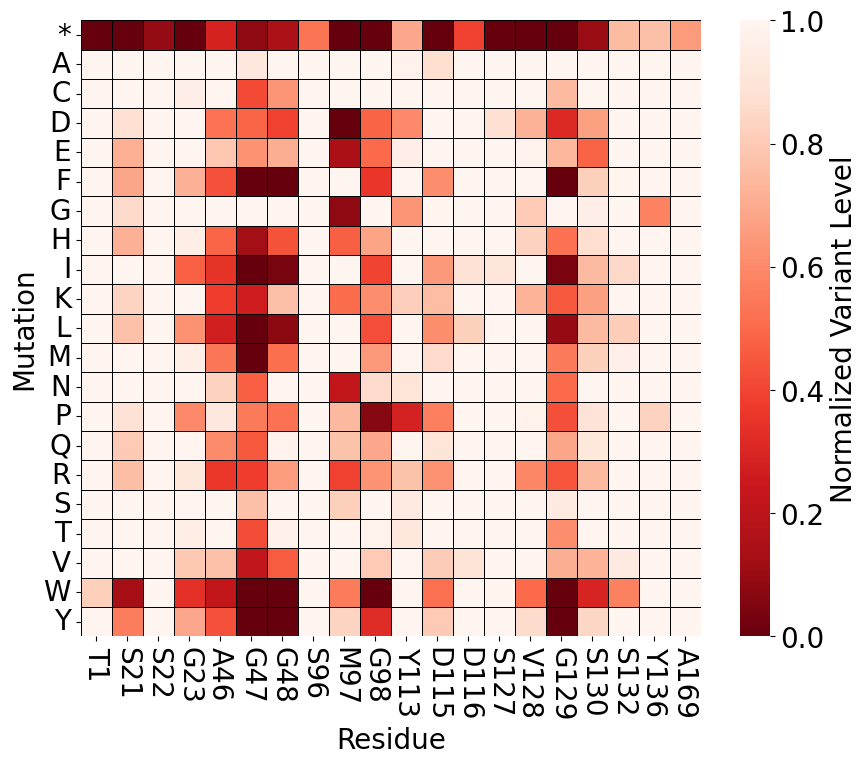

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define your custom cutoffs
cutoff_min = -0.0106 # corresponds to normalized value = 1
cutoff_max = -0.0233   # corresponds to normalized value = 0

# --- Normalize the matrix between 0–1 ---
normalized_matrix = (averaged_matrix - cutoff_max) / (cutoff_min - cutoff_max)
normalized_matrix = normalized_matrix.clip(0, 1)  # ensure all within 0–1

# --- Plot the normalized heatmap ---
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    normalized_matrix,
    annot=False,
    cmap="Reds_r",  # "Reds" shows 0=white, 1=red (inverted from your original Reds_r)
    vmin=0,
    vmax=1,
    linewidths=0.5,
    linecolor='black',
    cbar_kws={'label': 'Normalized Variant Level'}
)

ax.figure.axes[-1].yaxis.label.set_size(17)
ax.collections[0].colorbar.ax.set_ylabel('Normalized Variant Level', fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('Normalized Variant Level', fontsize=20)
# Set tick label font size
cbar.ax.tick_params(labelsize=20)
# Customize labels and ticks
plt.xlabel("Residue", fontsize=20)
plt.ylabel("Mutation", fontsize=20)
plt.xticks(rotation=270, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.title("", fontsize=18)
plt.savefig('mormalized_evo.png')
plt.show()

In [6]:
import pandas as pd
m_all = pd.read_csv('../data/cluster_combined_matrix.csv')
m_all = m_all.drop(columns=['Unnamed: 0'])
m_all

,Mutation,T1,S21,S22,G23,A46,G47,G48,S96,M97,...,Y113,D115,D116,S127,V128,G129,S130,S132,Y136,A169
0,A,1.66425,0.21225,-0.19925,-0.86150,0.00000,0.33725,0.00550,-0.07750,0.07700,...,10.38500,0.24075,-0.74800,-0.02625,4.18650,-0.87475,-0.20875,5.695,2.48425,0.00000
1,C,1.55175,0.09225,-0.09475,0.17175,-0.06175,1.53375,-0.54250,-0.73925,0.59325,...,9.45350,0.11775,-1.04800,-0.21675,3.13375,-2.85225,-1.27625,5.053,2.44250,0.36525
2,D,1.50550,0.04600,0.11325,-0.47575,3.25450,7.30500,-0.01850,0.72000,0.71625,...,10.22625,0.37825,0.00000,0.03725,7.11675,1.44300,1.14625,19.288,3.19400,-1.57125
3,E,-0.48975,-0.75050,0.15025,-0.54550,1.83425,0.67750,-0.24350,0.26600,0.38950,...,8.35700,0.74650,-0.27675,0.88775,3.81550,1.27050,-3.02650,9.795,3.26625,-1.61850
4,F,-3.43450,-2.66000,-0.12200,-1.31750,-1.25150,15.07275,0.28325,-2.01100,0.16850,...,3.66575,-2.26675,-2.91450,-0.40150,3.79600,-2.44375,-0.15150,7.162,1.24700,-3.14850
5,G,3.87450,1.62600,-0.39625,0.00000,1.05850,0.00000,0.00000,0.06025,0.18875,...,10.72050,1.57500,-0.08250,0.09450,7.39800,0.00000,0.40775,6.486,2.81975,1.17225
6,H,-1.30400,-3.59175,-0.46975,-0.68725,0.90575,4.99425,-0.86575,-2.66225,-0.55950,...,4.75875,-1.29225,-1.13350,-0.88125,1.32075,-5.28325,-1.92925,6.189,2.28300,-1.38675
7,I,-1.83725,-0.98050,-0.49775,-1.92375,0.02750,-0.70900,-2.97250,-1.49275,0.71925,...,8.13725,0.20900,-0.97250,-0.40975,-1.48250,2.02375,-2.32575,10.243,1.92575,-2.29425
8,K,3.46050,3.22775,0.27500,0.90925,4.42625,5.02425,0.05300,-1.62775,0.15475,...,12.02850,3.15400,-0.76600,-0.02100,9.03200,-1.67975,0.10500,2.659,1.68575,1.72150
9,L,-3.46900,-1.68250,-0.68225,-1.98675,-1.24525,-2.08650,-1.75650,-2.99600,0.51800,...,7.78050,0.40100,-1.67250,0.85000,2.08250,-2.21150,-3.49800,2.496,1.65075,-2.74650


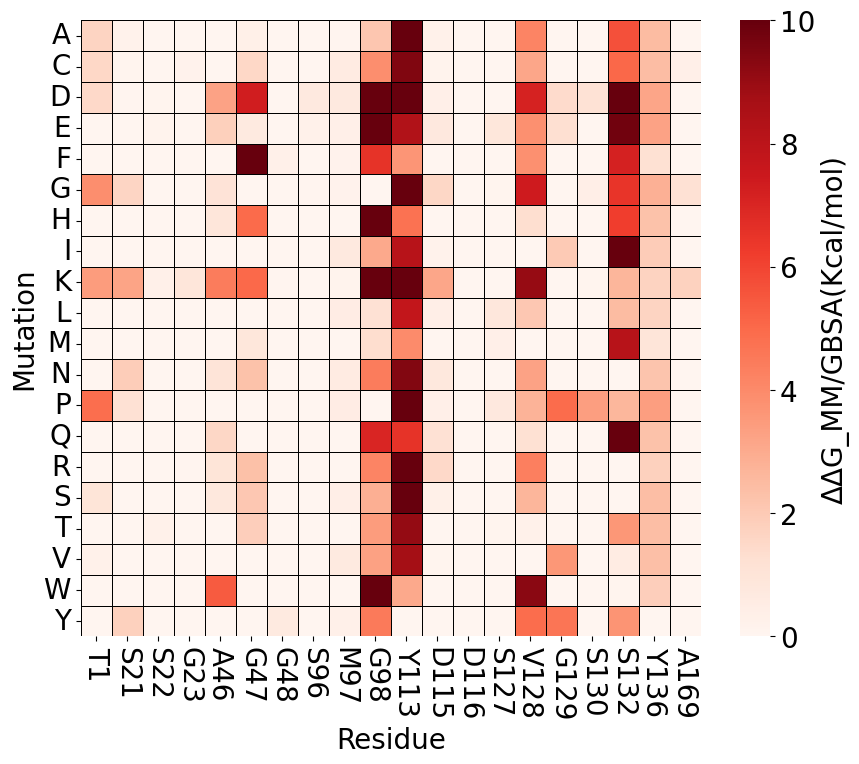

In [7]:
#Plot the original heatmap
import seaborn as sns
import matplotlib.pyplot as plt

m_all2 = m_all.copy()
m_all2.set_index('Mutation', inplace=True)

cutoff_min = 0  # Set the minimum value for the cutoff
cutoff_max = 10  # Set the maximum value for the cutoff

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
ax = sns.heatmap(m_all2, annot=False, cmap="Reds", vmin=cutoff_min, vmax=cutoff_max, linewidths=0.5, linecolor='black', cbar_kws={'label': 'ΔΔG_MM/GBSA(Kcal/mol)'})
ax.figure.axes[-1].yaxis.label.set_size(120)
ax.collections[0].colorbar.ax.set_ylabel('ΔΔG_MM/GBSA(Kcal/mol)', fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('ΔΔG_MM/GBSA(Kcal/mol)', fontsize=20)
# Set tick label font size
cbar.ax.tick_params(labelsize=20)
# Optional: Add labels and title
plt.xlabel("Residue", fontsize=20)
plt.ylabel("Mutation", fontsize=20)
plt.xticks(rotation=270,fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.xlabel("Residue")
plt.ylabel("Mutation")
plt.title("")
plt.show()

In [8]:
normalized_matrix = normalized_matrix.reset_index().rename(columns={"index": "Residue"})
normalized_matrix = normalized_matrix.iloc[1:].reset_index(drop=True)
normalized_matrix

,Residue,T1,S21,S22,G23,A46,G47,G48,S96,M97,...,Y113,D115,D116,S127,V128,G129,S130,S132,Y136,A169
0,A,1.000000,1.000000,1.000000,1.000000,1.000000,0.914149,1.000000,1.0,1.000000,...,0.980904,0.868044,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1,C,1.000000,1.000000,1.000000,0.958701,1.000000,0.412451,0.635536,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.748839,1.000000,1.000000,1.000000,1.0
2,D,1.000000,0.878284,1.000000,1.000000,0.529740,0.486827,0.389569,1.0,0.000000,...,0.595090,1.000000,1.000000,0.878895,0.722576,0.309114,0.666369,1.000000,1.000000,1.0
3,E,1.000000,0.711239,1.000000,1.000000,0.791973,0.622914,0.710066,1.0,0.145283,...,0.959375,1.000000,1.000000,1.000000,0.983196,0.734447,0.481395,1.000000,1.000000,1.0
4,F,1.000000,0.684881,1.000000,0.718575,0.430100,0.000000,0.000000,1.0,1.000000,...,1.000000,0.610681,1.000000,1.000000,1.000000,0.000000,0.817230,0.989492,1.000000,1.0
5,G,1.000000,0.852237,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.079138,...,0.635004,0.990336,1.000000,1.000000,0.803780,1.000000,0.959417,1.000000,0.576879,1.0
6,H,1.000000,0.717312,1.000000,0.954658,0.486905,0.122925,0.437036,1.0,0.470877,...,1.000000,1.000000,1.000000,1.000000,0.824722,0.522541,0.866364,1.000000,1.000000,1.0
7,I,1.000000,1.000000,1.000000,0.475549,0.344993,0.000000,0.031378,1.0,1.000000,...,1.000000,0.646630,0.884804,0.909220,1.000000,0.036544,0.747750,0.849919,1.000000,1.0
8,K,1.000000,0.830009,1.000000,1.000000,0.377810,0.264803,0.764196,1.0,0.504122,...,0.816157,0.754140,1.000000,1.000000,0.725617,0.453296,0.664475,1.000000,1.000000,1.0
9,L,1.000000,0.768275,1.000000,0.623658,0.269749,0.000000,0.074505,1.0,1.000000,...,1.000000,0.612629,0.816929,1.000000,1.000000,0.097656,0.748273,0.812396,1.000000,1.0


In [9]:
import pandas as pd

# Assume m_all is your "matrix2" (values to decrease)
# new_matrixb is your "matrix1" (scaling factors, 0-1)
m_allb = m_all.copy()

value_cols = m_allb.columns[1:]  # Skip mutation column if first column is mutation

# Scale m_all according to new_matrixb
m_allb.loc[:, value_cols] = m_allb.loc[:, value_cols] * (normalized_matrix.loc[:, value_cols])

# Check result
m_allb

,Mutation,T1,S21,S22,G23,A46,G47,G48,S96,M97,...,Y113,D115,D116,S127,V128,G129,S130,S132,Y136,A169
0,A,1.66425,0.212250,-0.199250,-0.861500,0.000000,0.308297,0.005500,-0.07750,0.077000,...,10.186690,0.208982,-0.748000,-0.026250,4.186500,-0.874750,-0.208750,5.695000,2.484250,0.00000
1,C,1.55175,0.092250,-0.094750,0.164657,-0.061750,0.632596,-0.344778,-0.73925,0.593250,...,9.453500,0.117750,-1.048000,-0.216750,3.133750,-2.135876,-1.276250,5.053000,2.442500,0.36525
2,D,1.50550,0.040401,0.113250,-0.475750,1.724040,3.556274,-0.007207,0.72000,0.000000,...,6.085535,0.378250,0.000000,0.032739,5.142389,0.446052,0.763825,19.288000,3.194000,-1.57125
3,E,-0.48975,-0.533785,0.150250,-0.545500,1.452676,0.422024,-0.172901,0.26600,0.056588,...,8.017497,0.746500,-0.276750,0.887750,3.751383,0.933115,-1.456942,9.795000,3.266250,-1.61850
4,F,-3.43450,-1.821785,-0.122000,-0.946722,-0.538270,0.000000,0.000000,-2.01100,0.168500,...,3.665750,-1.384260,-2.914500,-0.401500,3.796000,-0.000000,-0.123810,7.086740,1.247000,-3.14850
5,G,3.87450,1.385737,-0.396250,0.000000,1.058500,0.000000,0.000000,0.06025,0.014937,...,6.807556,1.559780,-0.082500,0.094500,5.946363,0.000000,0.391202,6.486000,1.626653,1.17225
6,H,-1.30400,-2.576405,-0.469750,-0.656089,0.441014,0.613916,-0.378364,-2.66225,-0.263456,...,4.758750,-1.292250,-1.133500,-0.881250,1.089252,-2.760714,-1.671432,6.189000,2.283000,-1.38675
7,I,-1.83725,-0.980500,-0.497750,-0.914837,0.009487,-0.000000,-0.093272,-1.49275,0.719250,...,8.137250,0.135146,-0.860472,-0.372553,-1.482500,0.073956,-1.739078,8.705721,1.925750,-2.29425
8,K,3.46050,2.679063,0.275000,0.909250,1.672280,1.330434,0.040502,-1.62775,0.078013,...,9.817146,2.378558,-0.766000,-0.021000,6.553771,-0.761425,0.069770,2.659000,1.685750,1.72150
9,L,-3.46900,-1.292622,-0.682250,-1.239052,-0.335905,-0.000000,-0.130868,-2.99600,0.518000,...,7.780500,0.245664,-1.366314,0.850000,2.082500,-0.215966,-2.617458,2.027739,1.650750,-2.74650


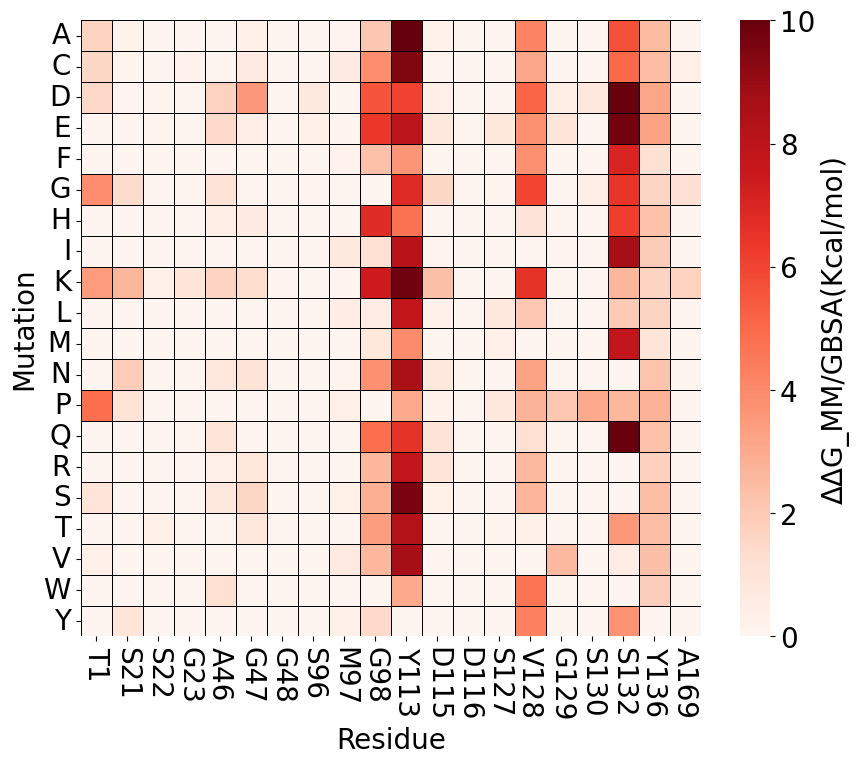

In [10]:
#Plot the clean heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dfc is your DataFrame, and the first column contains the letters
# Set the first column as the index
#df2.set_index(df2.columns[1], inplace=False)
m_allb.set_index('Mutation', inplace=True)

cutoff_min = 0  # Set the minimum value for the cutoff
cutoff_max = 10  # Set the maximum value for the cutoff

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
ax = sns.heatmap(m_allb, annot=False, cmap="Reds", vmin=cutoff_min, vmax=cutoff_max, linewidths=0.5, linecolor='black', cbar_kws={'label': 'ΔΔG_MM/GBSA(Kcal/mol)'})
ax.figure.axes[-1].yaxis.label.set_size(20)
ax.collections[0].colorbar.ax.set_ylabel('ΔΔG_MM/GBSA(Kcal/mol)', fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('ΔΔG_MM/GBSA(Kcal/mol)', fontsize=20)
# Set tick label font size
cbar.ax.tick_params(labelsize=20)
# Optional: Add labels and title
plt.xlabel("Residue", fontsize=20)
plt.ylabel("Mutation", fontsize=20)
plt.xticks(rotation=270,fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.xlabel("Residue")
plt.ylabel("Mutation")
plt.title("")

plt.show()

In [35]:
###Create a new dataframe withg normized results
df_long = m_all2.reset_index().melt(id_vars=m_allb.index.name, var_name='Residue', value_name='Δ_affinity')
if 'index' in df_long.columns:
    df_long = df_long.rename(columns={'index': 'Mutation'})
df_long['Full_residuem'] = df_long['Residue'] + df_long['Mutation']
df_long = df_long[['Full_residuem', 'Residue', 'Δ_affinity']]

com3 = df_long.copy()
com3 = com3.rename(columns={'Full_residuem':'Full_residue'})

In [39]:
com2 = pd.read_csv('../data/Evo_norm.csv')
com2

,Unnamed: 0,Full_residue,Evo_score_n
0,0,T1*,0.0
1,1,T1A,1.0
2,2,T1C,1.0
3,3,T1D,1.0
4,4,T1E,1.0
...,...,...,...
415,415,A169S,1.0
416,416,A169T,1.0
417,417,A169V,1.0
418,418,A169W,1.0


In [24]:
import pandas as pd
com = pd.read_csv('../data/all_experimental_pIC50_vs_predicted.csv')
com

,Unnamed: 0,Full_residue,ECWA,ECWA2,pIC50,ΔpIC50,Expression,Δ_affinity,Std,Variant-digit-class,Residue,Residue_Number,Residue_mutation,Label,ΔG_exp,ΔΔG_exp
0,0,G98A,32.4,3.240000e-08,7.489455,0.870545,1,2.12150,1.135265,5,G,98,A,A,-10.215617,1.187423
1,1,G98C,302.6,3.026000e-07,6.519131,1.840869,1,3.90150,3.131891,5,G,98,C,A,-8.892095,2.510945
2,2,G98H,202.9,2.029000e-07,6.692718,1.667282,1,9.99125,10.230305,5,G,98,H,A,-9.128867,2.274173
3,3,G98N,93.9,9.390000e-08,7.027334,1.332666,1,4.43450,4.796679,5,G,98,N,A,-9.585284,1.817756
4,4,G98Q,62.4,6.240000e-08,7.204815,1.155185,1,7.02375,5.890071,5,G,98,Q,A,-9.827368,1.575672
5,5,G98S,280.2,2.802000e-07,6.552532,1.807468,5,2.86950,2.571105,5,G,98,S,A,-8.937653,2.465387
6,6,G98Y,47.9,4.790000e-08,7.319664,1.040336,1,4.52400,6.194739,5,G,98,Y,A,-9.984022,1.419018
7,7,Y113A,302.7,3.027000e-07,6.518988,1.841012,1,10.38500,0.743063,5,Y,113,A,A,-8.891899,2.511141
8,8,Y113C,60.9,6.090000e-08,7.215383,1.144617,5,9.45350,0.876826,5,Y,113,C,A,-9.841782,1.561258
9,9,Y113D,261.1,2.611000e-07,6.583193,1.776807,1,10.22625,1.341454,1,Y,113,D,A,-8.979475,2.423565


In [25]:
import pandas as pd

# Assume your dataframes are called df1 and df2
# df1 has columns: Full_residue, affinity, error
# df2 has columns: Full_residue, Evo2_score

# Merge df1 with df2 to bring Evo2_score alongside
merged2 = pd.merge(com2[['Full_residue', 'Evo_score_n']], com, on='Full_residue', how='left')
merged3 = pd.merge(merged2, com3[['Full_residue', 'Δ_affinity']], on='Full_residue', how='left')

# Multiply the columns by Evo2_score
merged3['Δ_affinity_n'] = merged3['Δ_affinity_y'] * merged3['Evo_score_n']
merged3['Std_n'] = merged3['Std'] * merged3['Evo_score_n']
merged3 = merged3.fillna(0)
merged3['Position'] = merged3['Full_residue'].str.extract(r'(^[A-Za-z]+\d+)')
merged3['Mutation'] = merged3['Full_residue'].str.extract(r'(\d+)([A-Za-z])')[1]
merged3['Res'] = merged3['Full_residue'].str.extract(r'^([A-Za-z])')
merged3 = merged3.dropna(subset=['Mutation'])
merged3 = merged3[merged3['Mutation'] != merged3['Res']]
#merged3['ECWA2'] = merged3['ECWA2'].replace(0, 4)
#merged3['ECWA'] = merged3['ECWA'].replace(0, 4)
#merged3  = merged3[~(merged3['Δ_affinity_y'] >= 25000)]
merged3

,Full_residue,Evo_score_n,Unnamed: 0,ECWA,ECWA2,pIC50,ΔpIC50,Expression,Δ_affinity_x,Std,...,Residue_mutation,Label,ΔG_exp,ΔΔG_exp,Δ_affinity_y,Δ_affinity_n,Std_n,Position,Mutation,Res
1,T1A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,1.66425,1.66425,0.0,T1,A,T
2,T1C,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,1.55175,1.55175,0.0,T1,C,T
3,T1D,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,1.50550,1.50550,0.0,T1,D,T
4,T1E,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,-0.48975,-0.48975,0.0,T1,E,T
5,T1F,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,-3.43450,-3.43450,0.0,T1,F,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,A169S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,-1.01325,-1.01325,0.0,A169,S,A
416,A169T,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,-2.98425,-2.98425,0.0,A169,T,A
417,A169V,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.00000,0.00000,0.0,A169,V,A
418,A169W,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,-5.33550,-5.33550,0.0,A169,W,A


In [26]:
merged_s = merged3[['Δ_affinity_n','Position','ΔpIC50','Δ_affinity_y','ECWA','ECWA2']]
averaged = merged_s.groupby('Position').mean(numeric_only=True).reset_index()
averaged

,Position,Δ_affinity_n,ΔpIC50,Δ_affinity_y,ECWA,ECWA2
0,A169,-1.957816,0.006099,-1.957816,0.300000,3.000000e-10
1,A46,0.356686,0.000000,0.738105,0.000000,0.000000e+00
2,D115,0.085786,0.050975,0.041921,2.136842,2.136842e-09
3,D116,-1.233777,0.027909,-1.262645,0.778947,7.789474e-10
4,G129,-0.792314,0.000000,-1.144724,0.000000,0.000000e+00
5,G23,-0.837224,0.000000,-1.179592,0.000000,0.000000e+00
6,G47,0.517208,0.000000,1.615224,0.000000,0.000000e+00
7,G48,-0.361092,0.000000,-0.870421,0.000000,0.000000e+00
8,G98,3.088739,0.511282,27155.169713,53.805263,5.380526e-08
9,M97,0.158528,0.000000,0.216474,0.000000,0.000000e+00


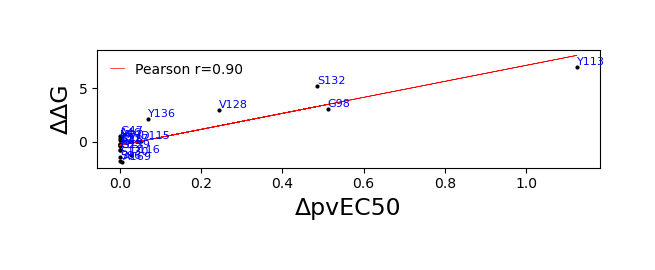

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr  # For Pearson correlation

# Select columns
x = averaged['ΔpIC50'].values.reshape(-1, 1)
y = averaged['Δ_affinity_n'].values.reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Compute R²
r2 = r2_score(y, y_pred)

# Compute Pearson r
r, p_value = pearsonr(x.flatten(), y.flatten())

# Plot
plt.figure(figsize=(6, 2))
plt.scatter(x, y, color='black')

# Regression line
plt.plot(x, y_pred, color='red', label=f'Pearson r={r:.2f}')

# Add labels from "position" column (adjust offset to avoid overlap)
for i, label in enumerate(averaged['Position']):
    plt.text(x[i], y[i], str(label), fontsize=8, color='blue', ha='left', va='bottom')

plt.xlabel('ΔpvEC50', fontsize=17)
plt.ylabel('ΔΔG', fontsize=17)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [28]:
#I have prepared the csv already with experimental and predicted data
import pandas as pd
df1 = pd.read_csv('../data/Information_per_circle_plot_norm.csv')
df1 = df1.iloc[:, 1:]
df1

,Mutation,Residue_Conc,Resistance,Residue,Source,Full_residuem
0,A,T1_Exp,0.00000,T1,Exp,T1A
1,C,T1_Exp,0.00000,T1,Exp,T1C
2,D,T1_Exp,0.00000,T1,Exp,T1D
3,E,T1_Exp,0.00000,T1,Exp,T1E
4,F,T1_Exp,0.00000,T1,Exp,T1F
...,...,...,...,...,...,...
795,S,A169_Pred,-1.01325,A169,Pred,A169S
796,T,A169_Pred,-2.98425,A169,Pred,A169T
797,V,A169_Pred,0.00000,A169,Pred,A169V
798,W,A169_Pred,-5.33550,A169,Pred,A169W


In [29]:
#We set A and B as flags for the class data
df1['Source'] = df1['Source'].replace({
    'Exp': 'A',
    'Pred': 'B'
})

In [30]:
#we create a dictionary for data to get ready to plot
name_map = {
    'T1': 'T1',
    'S21': 'S21',
    'S22': 'S22',
    'G23': 'G23',
    'A46': 'A46',
    'G47': 'G47',
    'G48': 'G48',
    'S96': 'S96',
    'M97': 'M97',
    'G98': 'G98',
    'Y113': 'Y113',
    'D115': 'D115',
    'D116': 'D116',
    'S127': 'S127',
    'V128': 'V128',
    'G129': 'G129',
    'S130': 'S130',
    'S132': 'S132',
    'Y136': 'Y136',
    'A169': 'A169'
}

grouped = df1.groupby('Residue', sort=False)
Residues_df = {name_map[name]: group for name, group in grouped}

/var/folders/jf/5d2my_zj23l_8drkz9g1d1sw0000gp/T/ipykernel_79774/4056742082.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reshaped_df = pd.concat([reshaped_df, mut_condition_row])
/Users/cmendozamartinez001/miniconda3/envs/prolif/lib/python3.13/site-packages/pycirclize/sector.py:159: UserWarning: r_lim=(155, 190) is unexpected plot range (0 <= r <= 100).
  warnings.warn(f"{r_lim=} is unexpected plot range (0 <= r <= 100).")
/Users/cmendozamartinez001/miniconda3/envs/prolif/lib/python3.13/site-packages/pycirclize/sector.py:159: UserWarning: r_lim=(35, 150) is unexpected plot range (0 <= r <= 100).
  warnings.warn(f"{r_lim=} is unexpected plot range (0 <= r <= 100).")
/var/folders/jf/5d2my_zj23l_8drkz9g1d1sw0000gp/T/ipykernel_79774/405

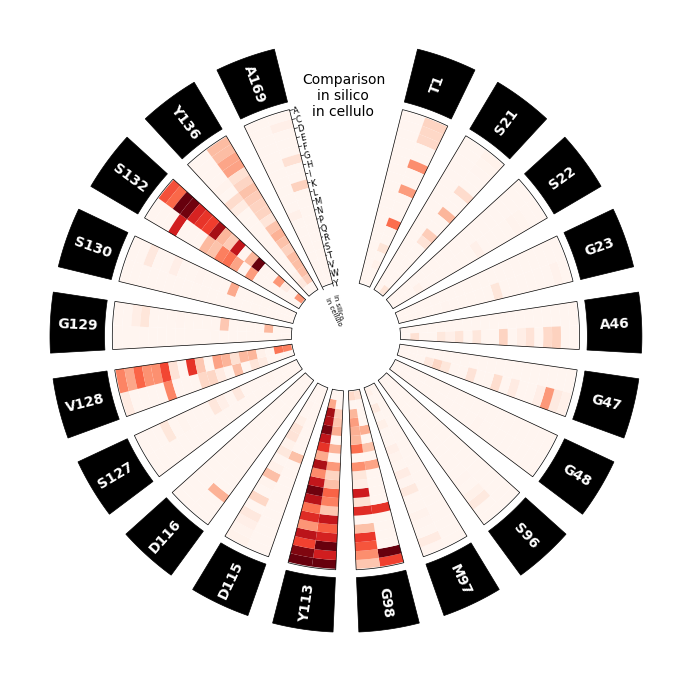

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pycirclize import Circos

Residues = sorted(list(set(df1.Residue)))
Mutations = sorted(list(set(df1["Mutation"].astype(str))))

# Create sectors based on data
sectors = {residue: len(dfi) // 2 for residue, dfi in Residues_df.items()}

# Initialize Circos plot
circos = Circos(sectors, space=5, start=14, end=346, endspace=False)

# Loop through each sector and create heatmap layers
for sector in circos.sectors:
    df = Residues_df[sector.name]
    
    # Reshape the data to match the required format
    reshaped_df = pd.DataFrame(columns=['Residue', 'Mutation', 'Source', 'Resistance'])
    for mutation in Mutations:
        for source in ['A', 'B']:
            mut_condition_row = df[(df['Mutation'] == mutation) & (df['Source'] == source)]
            reshaped_df = pd.concat([reshaped_df, mut_condition_row])
            reshaped_df.loc[reshaped_df["Source"] == "A", "Resistance"] *= 1.05

    # Pivot the dataframe to create a heatmap matrix for internal heatmap (track1)
    pivoted_df = reshaped_df.pivot(index='Source', columns='Mutation', values='Resistance')
    conversiona = pivoted_df.to_numpy()
    conversion = np.clip(conversiona, 0, 10)
    conversion = conversion.T  # Transpose to fit heatmap axis

    # Add outer track for sector name and axis
    outer_track = sector.add_track((155, 190))
    outer_track.text(sector.name, size=10, color="white", fontweight='bold', adjust_rotation=True, orientation='vertical')
    outer_track.axis(fc='black')

    # First internal heatmap track (track1) using the existing data (Reds)
    track1 = sector.add_track((35, 150), r_pad_ratio=0.01)
    track1.axis()
    track1.heatmap(conversion, vmin=0, vmax=10, cmap="Reds")

    mutation_labels = ['in cellulo', 'in silico']  # or however many match your data
    mutation_labels2 = ['Y', 'W', 'V', 'T', 'S', 'R', 'Q', 'P', 'N', 'M', 'L', 'K', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'A']

 # or however many match your data
    tick_positions = [0, 20]
    tick_positions2 = np.arange(len(mutation_labels2)) + 0
    if sector == circos.sectors[19]:
        track1.xticks(tick_positions, mutation_labels, outer=False, label_orientation='vertical', label_size=5, label_margin=5)
        track1.yticks(tick_positions2, mutation_labels2, label_size=6, label_margin=0)
#    track1.xticks(tick_positions, mutation_labels, outer=False, label_orientation='vertical', label_size=10, label_margin=5)
        
    pivoted_df2 = reshaped_df.pivot(index='Source', columns='Mutation', values='Resistance')
    conversion2a = pivoted_df2.to_numpy()
    conversion2 = np.clip(conversion2a, 0, 10)  # Example clipping transformation
    conversion2 = conversion2.T  # Transpose to fit heatmap axis

    # Add additional customization for tick marks and labels (optional)
    mutation_labels = pivoted_df.columns.tolist()
    tick_positions = np.arange(len(mutation_labels))  # Center of each heatmap column

# Add colorbar for the internal heatmap (Reds)
#circos.colorbar(bounds=(0.47, 1.2, 0.06, 0.01), vmin=0, vmax=1, orientation="horizontal", cmap="Reds")

circos.text(text="Comparison\nin silico\nin cellulo", r=155, deg=-0.6, fontsize=10)
#circos.text(text="Exp", r=155, deg=-0.6,fontsize=10)


# Draw a rectangle around the plot (optional)
circos.rect((0, 60), (0, 360), fc='none')

# Plot the figure and save the image
circos.plotfig()
plt.savefig('main3c.png', dpi=600)

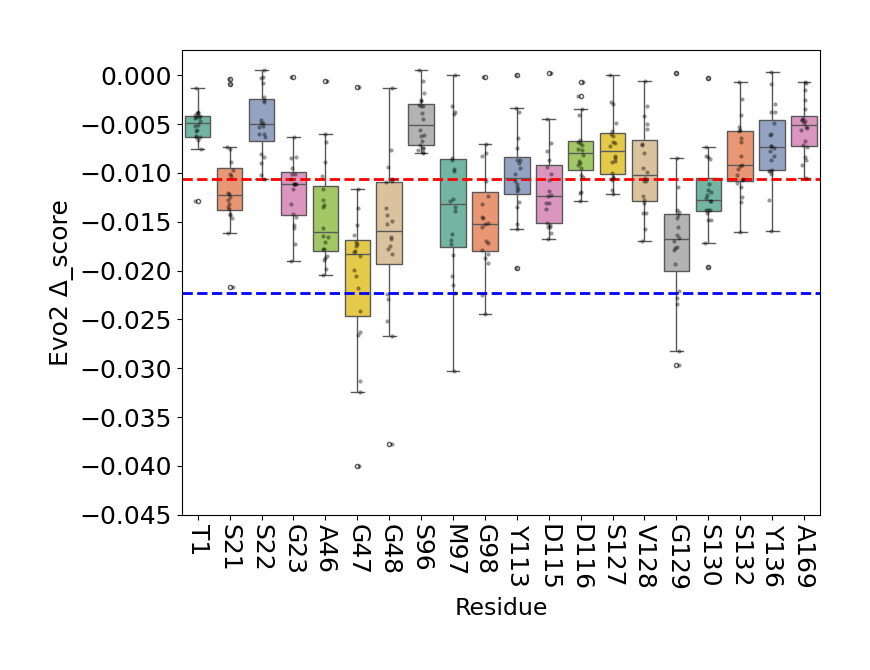

In [32]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 6))

# Create boxplots for each column
#sns.boxplot(data=averaged_matrix, palette='Set2')

# Optional: Add individual data points
#sns.stripplot(data=averaged_matrix, color='black', size=3, alpha=0.4, jitter=True)
sns.boxplot(data=averaged_matrix.iloc[1:], palette='Set2')
sns.stripplot(data=averaged_matrix.iloc[1:], color='black', size=3, alpha=0.4, jitter=True)


# Customize the plot
plt.xticks(rotation=-90, fontsize=18)

# Define y-ticks range
yticks = np.arange(0, -0.05, -0.005)  # Make sure step is negative to go downward
plt.yticks(yticks, fontsize=18)
plt.axhline(y=-0.0106, color='red', linestyle='--', linewidth=2)
plt.axhline(y=-0.0223, color='blue', linestyle='--', linewidth=2)

# Label and layout
plt.ylabel("Evo2 Δ_score", fontsize=18)
plt.xlabel("Residue", fontsize=17)
plt.title("")
plt.tight_layout()
plt.show()

In [33]:
averaged_matrix.index = [idx.replace('*', 'stop') for idx in averaged_matrix.index]

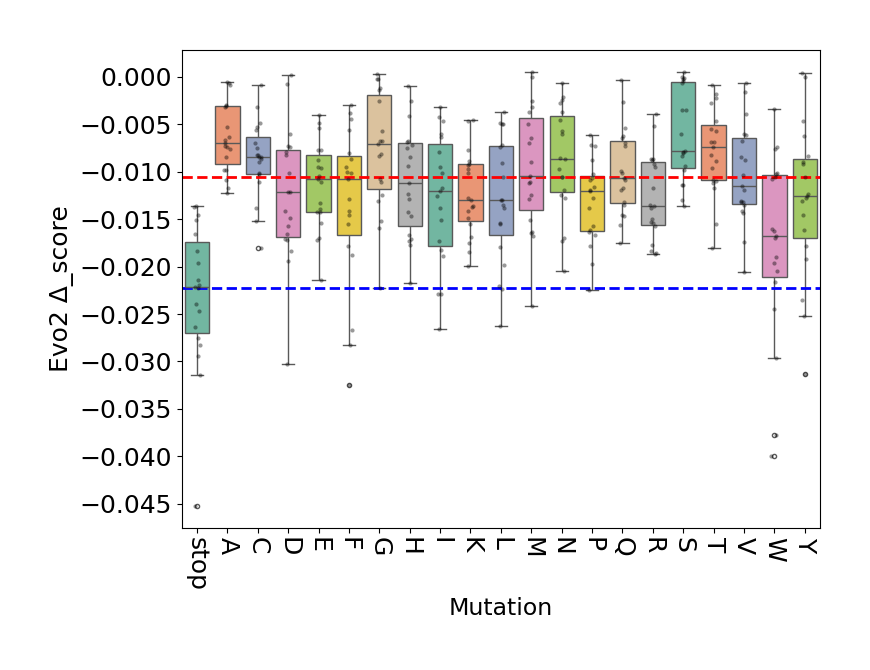

In [34]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 6))

# Optional: Add individual data points
#sns.stripplot(data=averaged_matrix, color='black', size=3, alpha=0.4, jitter=True)
sns.boxplot(data=averaged_matrix.T.iloc[1:], palette='Set2')
sns.stripplot(data=averaged_matrix.T.iloc[1:], color='black', size=3, alpha=0.4, jitter=True)

# Customize the plot
plt.xticks(rotation=-90, fontsize=18)

# Define y-ticks range
yticks = np.arange(0, -0.05, -0.005)  # Make sure step is negative to go downward
plt.yticks(yticks, fontsize=18)
plt.axhline(y=-0.0106, color='red', linestyle='--', linewidth=2)
plt.axhline(y=-0.0223, color='blue', linestyle='--', linewidth=2)

# Label and layout
plt.ylabel("Evo2 Δ_score", fontsize=18)
plt.xlabel("Mutation", fontsize=17)
plt.title("")
plt.tight_layout()
plt.show()